# **Learning Objectives for Azure Machine Learning (Hands-On Machine Learning - HOML)**

1. **Foundational Concepts**
   - Understand the key building blocks of Azure Machine Learning:
     - **ML Workspace**: Setting up and managing an Azure ML workspace.
     - **ML Studio**: Navigating the UI for experiments, datasets, models, endpoints, etc.
     - **Compute Targets**: Different compute targets and how to manage them.
     - **Data Stores**: Connecting to external and internal storage solutions.
     - **Data Assets**: How to create, register, and version datasets.


2. **Training Jobs and Compute Targets**
   - Learn how to submit training jobs using the **Azure SDK** (Python).
   - Understand different **compute targets** and when to use each:
     - **Compute Instances**
     - **Compute Clusters**
     - **Kubernetes Clusters (AKS)**
     - **Custom Servers / On-Premise Targets**

3. **Experimentation & MLflow Integration**
   - Explore **MLflow** for experiment tracking:
     - Logging parameters, metrics, and artifacts.
     - Registering trained models.
   - Understand how MLflow integrates with Azure ML for lifecycle tracking.

4. **Model Deployment & Real-Time Inference**
   - Learn how to deploy registered models to various endpoints.
   - Understand how to send **real-time inference requests** and validate predictions.

5. **Model Monitoring**
   - Track model performance post-deployment.
   - Understand data drift, prediction drift, and logging for production models.

6. **Operationalizing ML with Pipelines**
   - Build **end-to-end ML pipelines** using the Azure SDK:
     - Data preprocessing
     - Model training
     - Model registration
     - Model deployment
     - Testing and inference
   - Automate the pipeline for CI/CD and reproducibility.

7. **Azure ML Designer**
   - Explore **Azure ML Designer** (UI-based pipeline builder):
     - Learn available components.
     - Understand input/output data flows.
     - Build and deploy pipelines through a drag-and-drop interface.

8. **AutoML in Azure**
   - Understand Azure **AutoML** and its capabilities.
   - Learn different AutoML flavors (classification, regression, forecasting).
   - Train, evaluate, and deploy models using AutoML.


### 🌐 Connecting to Azure ML Workspace Programmatically

- **Loads workspace details from `config.json`**
- **Uses `DefaultAzureCredential` to authenticate (ideal for Azure ML Compute or environments with managed identity)**
- **Alternative: `InteractiveBrowserCredential` can be used for local development with user sign-in**
- **Initializes `MLClient` with subscription, resource group, and workspace name**
- **Retrieves and prints the list of compute targets in the workspace to verify the connection**

In [1]:
from azure.identity import InteractiveBrowserCredential
from azure.identity import DefaultAzureCredential
from azure.ai.ml import MLClient
import json

# Load config
with open("config.json") as f:
    config = json.load(f)

# Create credential that will prompt you to authenticate in a browser
# credential = InteractiveBrowserCredential()

# Connect to workspace when running locally
# This will use the Azure CLI credentials if available
# or prompt for credentials if not
# ml_client = MLClient(
#     credential=credential,
#     subscription_id=config["subscription_id"],
#     resource_group_name=config["resource_group"],
#     workspace_name=config["workspace_name"]
# )

# Connect to the Azure ML workspace using DefaultAzureCredential when running in Azure ML Compute
# This will use the managed identity of the Azure resource
# Uncomment the following lines if you want to use DefaultAzureCredential instead


ml_client = MLClient(
    DefaultAzureCredential(),
    subscription_id=config["subscription_id"],
    resource_group_name=config["resource_group"],
    workspace_name=config["workspace_name"]
)

# Verify connection
compute_list = ml_client.compute.list()
for compute in compute_list:
    print(compute.name, compute.type)

akscompute kubernetes
training-cluster amlcompute
dev-env computeinstance


### ⚙️ Starting a Specific Compute Instance

- **Specifies the name of the compute instance to start (`dev-env`)**
- **Uses `ml_client.compute.begin_start()` to initiate the start operation**
- **Appends `.wait()` to ensure the script waits until the instance is fully started before proceeding**

In [2]:
# Start a specific compute instance by name
# Replace "your-compute-instance-name" with the actual name from the list above
compute_instance_name = "dev-env"
ml_client.compute.begin_start(name=compute_instance_name).wait()

### 🛑 Stopping a Specific Compute Instance

- **Uses `ml_client.compute.begin_stop()` to stop the specified compute instance**
- **Includes `.wait()` to block execution until the instance is fully stopped**
- **Helps manage cost by shutting down unused resources**

In [ ]:
# Stop a specific compute instance by name
ml_client.compute.begin_stop(name=compute_instance_name).wait()

### 🔍 Retrieving Compute Instance Details

- **Uses `ml_client.compute.get()` to fetch the configuration and status of the specified compute instance**
- **Stores the result in the `compute` object for further inspection or usage**
- **Useful for accessing connection URIs, state, size, and other metadata**

In [19]:
# Get the connection details for your compute instance
compute = ml_client.compute.get(compute_instance_name)

In [20]:
print(compute)

created_on: 2025-03-29T10:37:55.588033+0000
enable_node_public_ip: true
enable_os_patching: false
enable_root_access: true
enable_sso: true
id: /subscriptions/40b3b6fa-c1eb-4567-bb9c-bfa430b41708/resourceGroups/tharindu-ml-tst-rg/providers/Microsoft.MachineLearningServices/workspaces/tharindu-ml-tst-wp/computes/dev-env
idle_time_before_shutdown: PT60M
idle_time_before_shutdown_minutes: 60
last_operation:
  operation_name: Start
  operation_status: Succeeded
  operation_time: '2025-03-29T14:25:05.590Z'
  operation_trigger: User
location: centralindia
name: dev-env
network_settings:
  private_ip_address: 10.0.0.4
  public_ip_address: 135.235.225.66
os_image_metadata:
  current_image_version: 24.12.31
  is_latest_os_image_version: true
  latest_image_version: 24.12.31
provisioning_state: Succeeded
release_quota_on_stop: false
services:
- display_name: Jupyter
  endpoint_uri: https://dev-env.centralindia.instances.azureml.ms/tree/
- display_name: Jupyter Lab
  endpoint_uri: https://dev-env

In [21]:
print(compute.services)

[{'display_name': 'Jupyter', 'endpoint_uri': 'https://dev-env.centralindia.instances.azureml.ms/tree/'}, {'display_name': 'Jupyter Lab', 'endpoint_uri': 'https://dev-env.centralindia.instances.azureml.ms/lab'}]


### 🗃️ Listing Available Datastores in Azure ML Workspace

- **Loops through all datastores registered in the current workspace**
- **Prints each datastore’s name and type (e.g., AzureBlob, AzureFile, etc.)**  
- **Useful for verifying available data storage options before referencing them in experiments**

In [25]:
for datastore in ml_client.datastores.list():
    print(f"Datastore: {datastore.name}, Type: {datastore.type}")

Datastore: testsa, Type: AzureBlob
Datastore: workspaceartifactstore, Type: AzureBlob
Datastore: workspacefilestore, Type: AzureFile
Datastore: workspaceblobstore, Type: AzureBlob
Datastore: workspaceworkingdirectory, Type: AzureFile


In [24]:
# Get the default datastore
default_ds = ml_client.datastores.get("workspaceblobstore")
print(default_ds)

account_name: tharindumltstw9939312202
container_name: azureml-blobstore-66abeafb-dccb-4b02-9514-0253ccea328c
credentials: {}
endpoint: core.windows.net
id: /subscriptions/40b3b6fa-c1eb-4567-bb9c-bfa430b41708/resourceGroups/tharindu-ml-tst-rg/providers/Microsoft.MachineLearningServices/workspaces/tharindu-ml-tst-wp/datastores/workspaceblobstore
name: workspaceblobstore
protocol: https
tags: {}
type: azure_blob



### 🏗️ Creating and Accessing an Azure Storage Account Programmatically

- **Sets up configuration variables**, including subscription, resource group, storage account name, and region.  
- **Creates credentials** using `DefaultAzureCredential` for seamless Azure identity management.  
- **Initializes the `StorageManagementClient`** to interact with Azure Storage resources.  
- **Creates a new Storage Account** (`StorageV2`, `Standard_LRS`) using `begin_create()` and waits for it to complete.  
- **Retrieves the access key** for the newly created storage account using `list_keys()`.  
- **Prints confirmation messages** after successful creation and key retrieval.

In [ ]:
!poetry add azure-mgmt-storage

In [2]:
from azure.mgmt.storage import StorageManagementClient
from azure.identity import InteractiveBrowserCredential

# Set your variables
subscription_id = config["subscription_id"]
resource_group = config["resource_group"]
storage_account_name = "thsklkmlstorage"
location = "centralindia"  # Choose appropriate region

# Create credential
# credential = InteractiveBrowserCredential()
credential = DefaultAzureCredential()

# Create a storage management client
storage_client = StorageManagementClient(credential, subscription_id)

# Create storage account
poller = storage_client.storage_accounts.begin_create(
    resource_group,
    storage_account_name,
    {
        "location": location,
        "kind": "StorageV2",
        "sku": {"name": "Standard_LRS"},
        "enable_https_traffic_only": True,
        "is_hns_enabled": False,
    }
)

# Wait for completion
storage_account = poller.result()
print(f"Storage account '{storage_account_name}' created successfully!")

# Get the storage account keys
keys = storage_client.storage_accounts.list_keys(resource_group, storage_account_name)
storage_key = keys.keys[0].value
print(f"Retrieved storage account key")

Storage account 'thsklkmlstorage' created successfully!
Retrieved storage account key


### 📦 Creating Blob Container and File Share in Azure Storage

- **Initializes `BlobServiceClient`** using the storage account URL and access key.  
- **Creates a new blob container** named `"mlcontainer"` using `create_container()`.  
- **Prints a confirmation message** upon successful container creation.

- **Initializes `ShareServiceClient`** for managing Azure File Shares.  
- **Creates a new file share** named `"mlfileshare"` using `create_share()`.  
- **Prints a confirmation message** upon successful file share creation.

In [3]:
from azure.storage.blob import BlobServiceClient
from azure.storage.fileshare import ShareServiceClient

# Create blob container
container_name = "mlcontainer"
blob_service = BlobServiceClient(
    account_url=f"https://{storage_account_name}.blob.core.windows.net", 
    credential=storage_key
)
blob_service.create_container(container_name)
print(f"Blob container '{container_name}' created successfully!")

# Create file share
file_share_name = "mlfileshare"
file_service = ShareServiceClient(
    account_url=f"https://{storage_account_name}.file.core.windows.net", 
    credential=storage_key
)
file_service.create_share(file_share_name)
print(f"File share '{file_share_name}' created successfully!")

Blob container 'mlcontainer' created successfully!
File share 'mlfileshare' created successfully!


### 🔗 Registering Blob and File Share Datastores in Azure ML

- **Creates an `AzureBlobDatastore` object** pointing to the previously created blob container.  
- **Uses `AccountKeyConfiguration`** to securely pass the storage account key.  
- **Registers the blob datastore** using `ml_client.datastores.create_or_update()`, making it available in the Azure ML workspace.  
- **Prints confirmation** upon successful blob datastore registration.

- **Creates an `AzureFileDatastore` object** pointing to the created file share.  
- **Registers the file datastore** using the same method.  
- **Prints confirmation** upon successful file datastore registration.

In [4]:
from azure.ai.ml.entities import AzureBlobDatastore, AzureFileDatastore
from azure.ai.ml.entities._datastore.azure_storage import AccountKeyConfiguration

# Create a blob datastore entity
blob_datastore = AzureBlobDatastore(
    name="mlcontainer",
    description="Datastore pointing to the blob container",
    account_name=storage_account_name,
    container_name=container_name,
    credentials=AccountKeyConfiguration(account_key=storage_key)  # Use proper object instead of dict
)

# Register the blob datastore
registered_blob_ds = ml_client.datastores.create_or_update(blob_datastore)
print(f"Blob datastore '{registered_blob_ds.name}' registered successfully!")

# Create a file datastore entity
file_datastore = AzureFileDatastore(
    name="mlfileshare",
    description="Datastore pointing to the file share",
    account_name=storage_account_name,
    file_share_name=file_share_name,
    credentials=AccountKeyConfiguration(account_key=storage_key)  # Use proper object instead of dict
)

# Register the file datastore
registered_file_ds = ml_client.datastores.create_or_update(file_datastore)
print(f"File datastore '{registered_file_ds.name}' registered successfully!")

Blob datastore 'mlcontainer' registered successfully!
File datastore 'mlfileshare' registered successfully!


### ✅ Verifying Datastore Registration in Azure ML

- **Lists all registered datastores** in the Azure ML workspace to confirm that your custom datastores are visible.  
- **Retrieves the blob datastore** named `"mlcontainer"` to verify it was registered correctly.  
- **Retrieves the file datastore** named `"mlfileshare"` for the same verification.  
- **Prints the names** of the retrieved datastores to confirm successful access.

In [5]:
# List all datastores to verify
print("All datastores in workspace:")
for datastore in ml_client.datastores.list():
    print(f"- {datastore.name} (Type: {datastore.type})")

# Get and test the blob datastore
blob_ds = ml_client.datastores.get("mlcontainer")
print(f"Retrieved blob datastore: {blob_ds.name}")

# Get and test the file datastore
file_ds = ml_client.datastores.get("mlfileshare")
print(f"Retrieved file datastore: {file_ds.name}")

All datastores in workspace:
- mlfileshare (Type: AzureFile)
- mlcontainer (Type: AzureBlob)
- workspaceartifactstore (Type: AzureBlob)
- workspacefilestore (Type: AzureFile)
- workspaceblobstore (Type: AzureBlob)
- workspaceworkingdirectory (Type: AzureFile)
Retrieved blob datastore: mlcontainer
Retrieved file datastore: mlfileshare


### 📥 Downloading NYC Taxi Data (Parquet)
- Creates a local directory named nyc_taxi_data to store the dataset.
- Iterates over all 12 months of 2022, constructs the URL for each monthly Parquet file.
- Downloads each Parquet file using pandas.read_parquet() and saves it locally.
- Handles download errors gracefully and logs progress per month.

In [ ]:
import pandas as pd
import os

# Create directory for data
os.makedirs('nyc_taxi_data', exist_ok=True)

# Example for yellow taxi data for 2022
for month in range(1, 13):
    month_str = str(month).zfill(2)
    url = f'https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2022-{month_str}.parquet'
    output_file = f'nyc_taxi_data/yellow_tripdata_2022-{month_str}.parquet'
    
    try:
        # Read and save the file
        df = pd.read_parquet(url)
        df.to_parquet(output_file)
        print(f"Downloaded data for month {month_str}")
    except Exception as e:
        print(f"Error downloading month {month_str}: {e}")

Downloaded data for month 01
Downloaded data for month 02
Downloaded data for month 03
Downloaded data for month 04
Downloaded data for month 05
Downloaded data for month 06
Downloaded data for month 07
Downloaded data for month 08
Downloaded data for month 09
Downloaded data for month 10
Downloaded data for month 11
Downloaded data for month 12


### 📄 Converting Parquet Files to a Single CSV
- Uses glob to find all .parquet files in the nyc_taxi_data directory.
- Reads each Parquet file into a temporary DataFrame and stores them in a list.
- Combines all monthly DataFrames into a single large DataFrame.
- Saves the final merged dataset as a CSV file named nyc_taxi_data_2022.csv in a data directory.
- Includes checks for missing directories, missing files, or read errors.

In [ ]:
import pandas as pd
import os
import glob # Import the glob module to find files matching a pattern

# Define the directory containing the Parquet files
data_directory = 'nyc_taxi_data'

# Check if the directory exists
if not os.path.isdir(data_directory):
    print(f"Error: Directory '{data_directory}' not found. Please ensure the data was downloaded.")
else:
    # Find all Parquet files in the directory
    # Use glob to easily find all files matching the pattern *.parquet
    parquet_files = glob.glob(os.path.join(data_directory, '*.parquet'))

    # Check if any parquet files were found
    if not parquet_files:
        print(f"No Parquet files found in directory '{data_directory}'.")
    else:
        print(f"Found {len(parquet_files)} Parquet files. Loading...")

        # List to hold individual DataFrames
        list_of_dataframes = []

        # Loop through the list of Parquet files
        for file_path in parquet_files:
            try:
                # Read the Parquet file into a DataFrame
                df_temp = pd.read_parquet(file_path)
                # Append the DataFrame to the list
                list_of_dataframes.append(df_temp)
                print(f"Loaded {os.path.basename(file_path)}")
            except Exception as e:
                print(f"Error loading file {file_path}: {e}")

        # Check if any DataFrames were successfully loaded
        if list_of_dataframes:
            # Concatenate all DataFrames in the list into a single DataFrame
            # ignore_index=True resets the index for the combined DataFrame
            combined_df = pd.concat(list_of_dataframes, ignore_index=True)
        else:
            print("No dataframes were loaded.")

combined_df.to_csv("./data/nyc_taxi_data_2022.csv")


Found 12 Parquet files. Loading...
Loaded yellow_tripdata_2022-01.parquet
Loaded yellow_tripdata_2022-02.parquet
Loaded yellow_tripdata_2022-03.parquet
Loaded yellow_tripdata_2022-04.parquet
Loaded yellow_tripdata_2022-05.parquet
Loaded yellow_tripdata_2022-06.parquet
Loaded yellow_tripdata_2022-07.parquet
Loaded yellow_tripdata_2022-08.parquet
Loaded yellow_tripdata_2022-09.parquet
Loaded yellow_tripdata_2022-10.parquet
Loaded yellow_tripdata_2022-11.parquet
Loaded yellow_tripdata_2022-12.parquet

All Parquet files loaded and combined successfully!
Total rows in combined DataFrame: 39656098

First 5 rows of the combined DataFrame:
   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2022-01-01 00:35:40   2022-01-01 00:53:29              2.0   
1         1  2022-01-01 00:33:43   2022-01-01 00:42:07              1.0   
2         2  2022-01-01 00:53:21   2022-01-01 01:02:19              1.0   
3         2  2022-01-01 00:25:21   2022-01-01 00:35:23      

In [9]:
combined_df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,14.50,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,8.00,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,7.50,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,8.00,0.5,0.5,0.00,0.0,0.3,11.80,2.5,0.0
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,23.50,0.5,0.5,3.00,0.0,0.3,30.30,2.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39656093,2,2022-12-31 23:46:00,2023-01-01 00:11:00,NaN,11.56,NaN,None,16,36,0,39.55,0.0,0.5,8.21,0.0,1.0,49.26,NaN,NaN
39656094,2,2022-12-31 23:13:24,2022-12-31 23:29:08,NaN,5.06,NaN,None,75,50,0,26.23,0.0,0.5,0.00,0.0,1.0,30.23,NaN,NaN
39656095,2,2022-12-31 23:00:49,2022-12-31 23:26:57,NaN,13.35,NaN,None,168,197,0,47.73,0.0,0.5,9.85,0.0,1.0,59.08,NaN,NaN
39656096,1,2022-12-31 23:02:50,2022-12-31 23:16:05,NaN,0.00,NaN,None,238,116,0,12.74,0.0,0.5,0.00,0.0,1.0,16.74,NaN,NaN


In [10]:
combined_df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee'],
      dtype='object')

In [12]:
combined_df.to_csv("./data/nyc_taxi_data_2022.csv")

### 🔐 Authentication and Setup
Loads Azure ML workspace details from config.json.

Uses DefaultAzureCredential to authenticate with Azure services.

Retrieves the storage account key using the Azure Storage Management Client.

Initializes an MLClient for interacting with Azure ML workspace resources.

In [1]:
import os
import json

from azure.identity import DefaultAzureCredential
from azure.mgmt.storage import StorageManagementClient

from azure.ai.ml import MLClient

# Configuration values
storage_account_name = "thsklkmlstorage"
location = "centralindia"
container_name = "mlcontainer"
file_share_name = "mlfileshare"
blob_datastore_name = "mlcontainer"
file_share_datastore_name = "mlfileshare"

local_parquet_folder = "nyc_taxi_data"
local_csv_folder = "data"
csv_filename = "nyc_taxi_data_2022.csv"
local_csv_path = os.path.join(local_csv_folder, csv_filename)

# Load config
with open("config.json") as f:
    config = json.load(f)

subscription_id = config["subscription_id"]
resource_group = config["resource_group"]
workspace_name=config["workspace_name"]


# Create Azure credential
credential = DefaultAzureCredential()

# Create a storage management client and get the storage key
storage_client = StorageManagementClient(credential, subscription_id)
keys = storage_client.storage_accounts.list_keys(resource_group, storage_account_name)
storage_key = keys.keys[0].value

# Create ML client
ml_client = MLClient(
    credential=credential,
    subscription_id=config["subscription_id"],
    resource_group_name=config["resource_group"],
    workspace_name=config["workspace_name"],
)


### 📤 Upload Parquet Files to Azure Blob Storage
- Connects to the specified Blob container using BlobServiceClient.
- Scans the local nyc_taxi_data folder for .parquet files.
- Uploads each file to the container, preserving folder structure.
- Uses upload_blob(..., overwrite=True) to ensure updates if the file already exists.

In [8]:
from azure.storage.blob import BlobServiceClient
import os
import glob

# Create BlobServiceClient
blob_service_client = BlobServiceClient(
    account_url=f"https://{storage_account_name}.blob.core.windows.net",
    credential=storage_key
)
container_client = blob_service_client.get_container_client(container_name)
print(f"Connected to blob container: {container_name}")

# Upload Parquet files (preserving folder structure)
parquet_files = glob.glob(os.path.join(local_parquet_folder, '*.parquet'))
print(f"Found {len(parquet_files)} Parquet files to upload.")

for file_path in parquet_files:
    # Define the blob name including the directory structure
    blob_name = os.path.join(local_parquet_folder, os.path.basename(file_path)).replace("\\", "/")
    blob_client = container_client.get_blob_client(blob=blob_name)
    print(f"Uploading {os.path.basename(file_path)} to blob {blob_name}...")
    with open(file_path, "rb") as data:
        blob_client.upload_blob(data, overwrite=True)


Connected to blob container: mlcontainer
Found 12 Parquet files to upload.
Uploading yellow_tripdata_2022-01.parquet to blob nyc_taxi_data/yellow_tripdata_2022-01.parquet...
Uploading yellow_tripdata_2022-02.parquet to blob nyc_taxi_data/yellow_tripdata_2022-02.parquet...
Uploading yellow_tripdata_2022-03.parquet to blob nyc_taxi_data/yellow_tripdata_2022-03.parquet...
Uploading yellow_tripdata_2022-04.parquet to blob nyc_taxi_data/yellow_tripdata_2022-04.parquet...
Uploading yellow_tripdata_2022-05.parquet to blob nyc_taxi_data/yellow_tripdata_2022-05.parquet...
Uploading yellow_tripdata_2022-06.parquet to blob nyc_taxi_data/yellow_tripdata_2022-06.parquet...
Uploading yellow_tripdata_2022-07.parquet to blob nyc_taxi_data/yellow_tripdata_2022-07.parquet...
Uploading yellow_tripdata_2022-08.parquet to blob nyc_taxi_data/yellow_tripdata_2022-08.parquet...
Uploading yellow_tripdata_2022-09.parquet to blob nyc_taxi_data/yellow_tripdata_2022-09.parquet...
Uploading yellow_tripdata_2022-10.


### 📤 **Upload CSV to Azure Blob Storage**
- Connects to the specified Azure **Blob container**.  
- Uploads `nyc_taxi_data_2022.csv` from the local `./data/` folder to the container root.  
- Uses `overwrite=True` to replace the file if it already exists.


In [9]:
file_path = './data/nyc_taxi_data_2022.csv'

blob_service_client = BlobServiceClient(
    account_url=f"https://{storage_account_name}.blob.core.windows.net",
    credential=storage_key
)
container_client = blob_service_client.get_container_client(container_name)

blob_client = container_client.get_blob_client(blob="nyc_taxi_data_2022.csv")

with open(file_path, "rb") as data:
        blob_client.upload_blob(data, overwrite=True)

### 📤 Upload Parquet Files to Azure File Share
- Connects to the specified Azure File Share using ShareServiceClient.
- Ensures the target directory (e.g., nyc_taxi_data) exists in the file share.
- Uploads each .parquet file to the directory inside the file share.

In [10]:
from azure.storage.fileshare import ShareServiceClient
import os

# Create ShareServiceClient
share_service_client = ShareServiceClient(
    account_url=f"https://{storage_account_name}.file.core.windows.net",
    credential=storage_key
)
share_client = share_service_client.get_share_client(file_share_name)
print(f"Connected to file share: {file_share_name}")

# Ensure the target directory exists in the file share for Parquet files
share_directory_client = share_client.get_directory_client(local_parquet_folder)
if not share_directory_client.exists():
    print(f"Creating directory '{local_parquet_folder}' in file share...")
    share_directory_client.create_directory()

# Upload Parquet files
print(f"Uploading {len(parquet_files)} Parquet files to file share directory '{local_parquet_folder}'...")
for file_path in parquet_files:
    file_name = os.path.basename(file_path)
    share_file_client = share_directory_client.get_file_client(file_name)
    print(f"Uploading {file_name}...")
    with open(file_path, "rb") as source_file:
        share_file_client.upload_file(source_file)


Connected to file share: mlfileshare
Creating directory 'nyc_taxi_data' in file share...
Uploading 12 Parquet files to file share directory 'nyc_taxi_data'...
Uploading yellow_tripdata_2022-01.parquet...
Uploading yellow_tripdata_2022-02.parquet...
Uploading yellow_tripdata_2022-03.parquet...
Uploading yellow_tripdata_2022-04.parquet...
Uploading yellow_tripdata_2022-05.parquet...
Uploading yellow_tripdata_2022-06.parquet...
Uploading yellow_tripdata_2022-07.parquet...
Uploading yellow_tripdata_2022-08.parquet...
Uploading yellow_tripdata_2022-09.parquet...
Uploading yellow_tripdata_2022-10.parquet...
Uploading yellow_tripdata_2022-11.parquet...
Uploading yellow_tripdata_2022-12.parquet...




### 📤 **Upload CSV to Azure File Share**
- Connects to the specified **File Share**.  
- Uses a directory client (`share_directory_client`) to target the upload path.  
- Uploads the CSV file (`nyc_taxi_data_2022.csv`) to the file share directory.



In [11]:
file_path = './data/nyc_taxi_data_2022.csv'

share_service_client = ShareServiceClient(
    account_url=f"https://{storage_account_name}.file.core.windows.net",
    credential=storage_key
)
share_client = share_service_client.get_share_client(file_share_name)

share_file_client = share_directory_client.get_file_client("nyc_taxi_data_2022.csv")

with open(file_path, "rb") as source_file:
        share_file_client.upload_file(source_file)

### 📦 Register Folder as a Data Asset in Azure ML
- Constructs a URI_FOLDER-type path to the uploaded folder in the blob datastore.
- Creates a new data asset representing the folder of Parquet files.
- Registers (or updates) the asset in Azure ML using ml_client.data.create_or_update().
- Asset is now available for use in pipelines, experiments, and training jobs.

In [14]:
from azure.ai.ml.entities import Data
from azure.ai.ml.constants import AssetTypes

# Construct the full path URI for Azure ML datastores
base_path = (
    f"azureml://subscriptions/{subscription_id}/resourcegroups/{resource_group}/"
    f"workspaces/{workspace_name}/datastores/{blob_datastore_name}/paths/"
)

# Register the folder containing Parquet files
folder_asset_name = "nyc-taxi-2022-parquet"
folder_path_uri = base_path + f"{local_parquet_folder}/"

folder_data_asset = Data(
    name=folder_asset_name,
    path=folder_path_uri,
    type=AssetTypes.URI_FOLDER,
    description="Folder containing NYC Yellow Taxi trip data for 2022 (Parquet format).",
    version="1"
)

ml_client.data.create_or_update(folder_data_asset)
print(f"Successfully registered/updated data asset (folder): '{folder_asset_name}'")

Successfully registered/updated data asset (folder): 'nyc-taxi-2022-parquet'


### 📦 **Register CSV File as a Data Asset in Azure ML**
- Constructs the full **URI path** for the CSV file in the file share datastore.  
- Creates a new Azure ML **data asset** with type `URI_FILE`.  
- Sets metadata like `name`, `description`, and `version`.  
- Registers the file in Azure ML using `ml_client.data.create_or_update()`.

In [13]:
from azure.ai.ml.entities import Data
from azure.ai.ml.constants import AssetTypes


file_in_datastore = 'nyc_taxi_data_2022.csv'

base_path = (
    f"azureml://subscriptions/{subscription_id}/resourcegroups/{resource_group}/"
    f"workspaces/{workspace_name}/datastores/{file_share_datastore_name}/paths/"
)

file_path_uri = base_path + f"{local_parquet_folder}/" + f"{file_in_datastore}"

print(file_path_uri)

my_data = Data(
        path=file_path_uri,
        type=AssetTypes.URI_FILE,
        description="NYC Taxi Data 2022",
        name="nyc-taxi-2022-csv",
        version="2"
    )

registered_data = ml_client.data.create_or_update(my_data)

azureml://subscriptions/40b3b6fa-c1eb-4567-bb9c-bfa430b41708/resourcegroups/tharindu-ml-tst-rg/workspaces/tharindu-ml-tst-wp/datastores/mlfileshare/paths/nyc_taxi_data/nyc_taxi_data_2022.csv


### 📦 **Register a Local CSV File as a Data Asset in Azure ML**

- Specifies the path to a local file: `insurance.csv`.  
- Creates a new **data asset** of type `URI_FILE` with metadata including name, version, and description.  
- Registers the data asset in Azure Machine Learning using `ml_client.data.create_or_update()`.  
- This makes the file available in your Azure ML workspace for use in experiments, pipelines, and training jobs.

In [8]:
from azure.ai.ml.entities import Data
from azure.ai.ml.constants import AssetTypes


local_file = './data/insurance.csv'

print(local_file)

my_data = Data(
        path=local_file,
        type=AssetTypes.URI_FILE,
        description="Medical Insurance Costs Dataset",
        name="insurance-csv",
        version="1"
    )

registered_data = ml_client.data.create_or_update(my_data)

./data/insurance.csv


Uploading insurance.csv (< 1 MB): 100%|██████████| 54.3k/54.3k [00:00<00:00, 4.13MB/s]




### 🌐 **Register a Public URL as a Data Asset in Azure ML**

- Defines a **public URL** pointing to the `insurance.csv` dataset hosted on GitHub.  
- Creates a new Azure ML **data asset** of type `URI_FILE`, referencing the external file directly.  
- Registers the asset in your workspace using `ml_client.data.create_or_update()`.  
- Prints the asset name and version to confirm successful registration.

This method is ideal for working with **external or publicly available datasets** without uploading them to Azure Storage.

In [14]:
from azure.ai.ml.entities import Data
from azure.ai.ml.constants import AssetTypes

# Define the public URL for the insurance dataset
public_url = "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv"

# Create the data asset with the URL
my_data = Data(
    path=public_url,
    type=AssetTypes.URI_FILE,
    description="Medical Insurance Costs Dataset",
    name="insurance-public-url",
    version="1"
)

# Register the data asset with the ML client
registered_data = ml_client.data.create_or_update(my_data)

# Print the registered data asset details
print(f"Data asset registered: {registered_data.name}, version: {registered_data.version}")

Data asset registered: insurance-public-url, version: 1


### 📥 **Retrieve and Load Registered Data Asset**
- Retrieves the registered data asset named `"insurance-public-url"` (version 1) from the Azure ML workspace.  
- Extracts the asset’s `path` and wraps it as a job `Input` of type `"uri_file"`.  
- Loads the dataset into a **Pandas DataFrame** using `pd.read_csv()`.


In [2]:
from azure.ai.ml import MLClient, Input
import pandas as pd

# Retrieve the registered data asset
data_asset = ml_client.data.get(name="insurance-public-url", version="1")
print(f"Data asset found: {data_asset.name} (version: {data_asset.version})")

# Get the data path and create a job input
data_path = data_asset.path
job_input = Input(type="uri_file", path=data_path)
print(f"\nData path: {data_path}")
print(f"Job input created: {job_input}")

# Load the CSV data into a pandas DataFrame
df = pd.read_csv(job_input.path)

# Display a preview and information about the data
print("\n--- Data Preview (first 5 rows) ---")
print(df.head())

print("\n--- DataFrame Information ---")
df.info()

Data asset found: insurance-public-url (version: 1)

Data path: https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv
Job input created: {'type': 'uri_file', 'path': 'https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv'}

--- Data Preview (first 5 rows) ---
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

--- DataFrame Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 no

### 🚀 **Start an MLflow Run**
- Initializes an MLflow run using `mlflow.start_run()` to track experiment metadata, parameters, metrics, and artifacts.

---

**Log Data Source Parameters**
- Logs metadata about the data asset used in the run:
  - `name`
  - `version`
  - `path`
- These help in tracing which dataset was used during the experiment.

---

**Log Data Metrics**
- Logs basic data metrics:
  - Number of rows (`num_rows_loaded`)
  - Number of columns (`num_columns_loaded`)
- Useful for quickly assessing the size of the dataset being used.

---

**Log Data Summary as Artifact**
- Captures the output of `df.info()` (data structure and types) and saves it to a `.txt` file.
- Logs this file as an artifact in the current MLflow run for review later.

---

**Log Data Preview**
- Saves the first few rows of the dataset as a `.csv` file.
- Logs it as an artifact to provide a quick preview of the data used in the run.

In [3]:
import mlflow
import mlflow.sklearn
import io

mlflow.start_run()
print("MLflow Run Started")

# --- MLflow Integration: Log Data Source Parameters ---
# Log details about the data asset being used as parameters for this run
mlflow.log_param("data_asset_name", data_asset.name)
mlflow.log_param("data_asset_version", data_asset.version)
mlflow.log_param("data_asset_path", data_asset.path)
print("\nLogged data asset parameters to MLflow")


# --- MLflow Integration: Log Data Metrics & Artifacts ---
# Log some basic metrics about the loaded data
mlflow.log_metric("num_rows_loaded", df.shape[0])
mlflow.log_metric("num_columns_loaded", df.shape[1])
print("\nLogged data metrics (rows, columns) to MLflow")

# Log the output of df.info() as an artifact file
info_buffer = io.StringIO()
df.info(buf=info_buffer)
info_str = info_buffer.getvalue()
with open("data_info.txt", "w") as f:
    f.write(info_str)
mlflow.log_artifact("data_info.txt")
print("Logged df.info() output as 'data_info.txt' artifact to MLflow")

# Optionally, log the first few rows (preview) as an artifact
preview_filename = "data_preview.csv"
df.head().to_csv(preview_filename, index=False)
mlflow.log_artifact(preview_filename)
print(f"Logged data preview as '{preview_filename}' artifact to MLflow")

/anaconda/envs/azureml_py310_sdkv2/lib/python3.10/site-packages/azureml/mlflow/_protos/aml_service_pb2.py:10: UserWarning: google.protobuf.service module is deprecated. RPC implementations should provide code generator plugins which generate code specific to the RPC implementation. service.py will be removed in Jan 2025
  from google.protobuf import service as _service


MLflow Run Started

Logged data asset parameters to MLflow

Logged data metrics (rows, columns) to MLflow
Logged df.info() output as 'data_info.txt' artifact to MLflow
Logged data preview as 'data_preview.csv' artifact to MLflow


In [4]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## 📊 **Exploratory Data Analysis (EDA) with MLflow Logging**

---

🟢 **MLflow Run Context**
- Ensures an MLflow run is active before logging metrics and artifacts.
- (Optional) You can check or start a new run if needed.

📋 **Logging Summary Statistics, Missing Values & Duplicates**
- Calculates and logs:
  - `summary_statistics.csv` containing descriptive stats for numeric columns.
  - `missing_values.csv` with null counts for each column.
  - Duplicate row count as an MLflow metric.

🔍 **Column Type Identification**
- Detects and logs:
  - Count of **numerical** columns (`int64`, `float64`)
  - Count of **categorical** columns (`object` types)

📉 **Numerical Feature Histograms**
- Creates a histogram for each numeric column.
- Logs each histogram as a PNG file to MLflow under the `histograms/` directory.
- Displays each plot inline and closes the figure to manage memory.

📊 **Categorical Feature Bar Charts**
- Generates bar charts for each categorical column.
- Saves and logs them to MLflow under `bar_charts/`.
- Displays charts inline and closes figures after logging.

🧮 **Correlation Matrix**
- Calculates pairwise correlations for numerical columns.
- Saves the correlation matrix as a CSV (`correlation_matrix.csv`).
- Visualizes the matrix using a heatmap and logs the plot to MLflow (`correlation_matrix_heatmap.png`).

🔗 **Scatter Plots vs. Target Variable (`charges`)**
- If the `charges` column exists:
  - Plots scatter plots of every other numerical column against `charges`.
  - Logs each figure under `scatter_plots/` in MLflow.
  - Useful for detecting linear or non-linear relationships with the target variable.

📦 **Box Plots for Outlier Detection**
- Creates box plots for all numerical features to visualize value distribution and potential outliers.
- Logs plots to MLflow under `box_plots/`.
- Displays each plot inline and then closes the figure.

✅ **Final Output**
- All EDA outputs (metrics, statistics, and plots) are logged to MLflow and displayed inline.
- The workflow supports both tracking and reproducibility for data exploration steps.


--- Starting EDA ---

Calculating and logging summary statistics...
Logged summary statistics to MLflow artifact: summary_statistics.csv

Summary statistics for numerical columns:
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

Calculating and logging missing values...
Logged missing values count to MLflow artifact: missing_values.csv

Missing values in each column:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Calculating and logging duplicate r

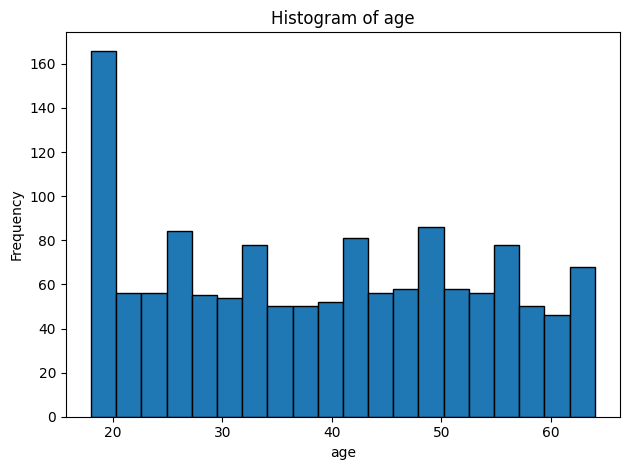

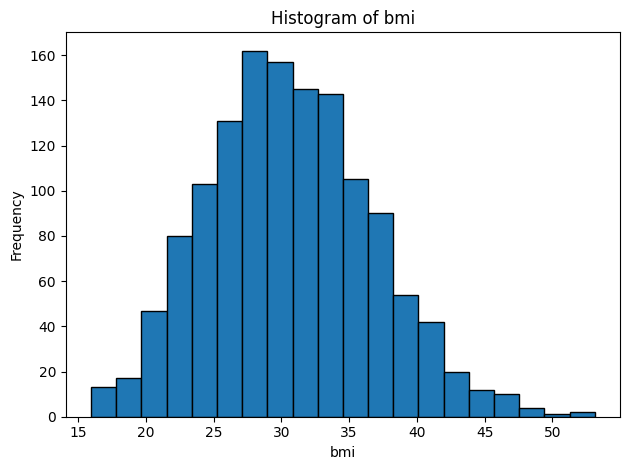

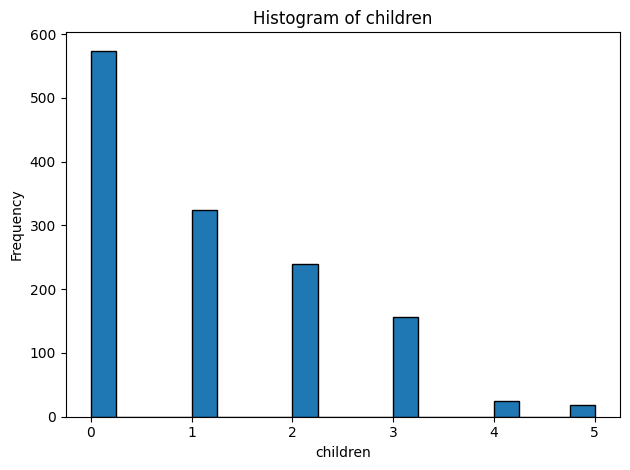

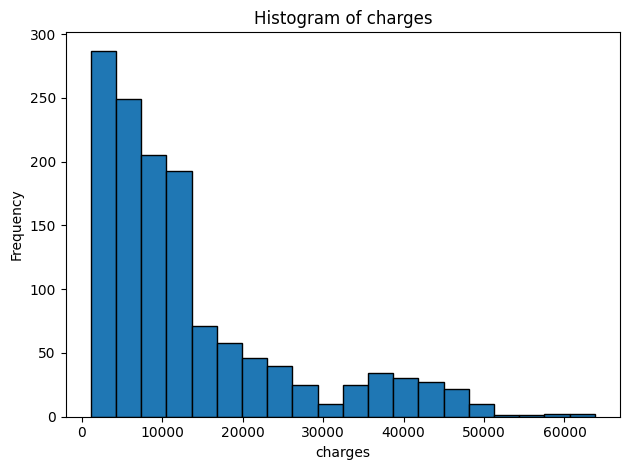

Displayed histograms inline and logged to MLflow artifacts under 'histograms'

Generating, displaying, and logging bar charts...


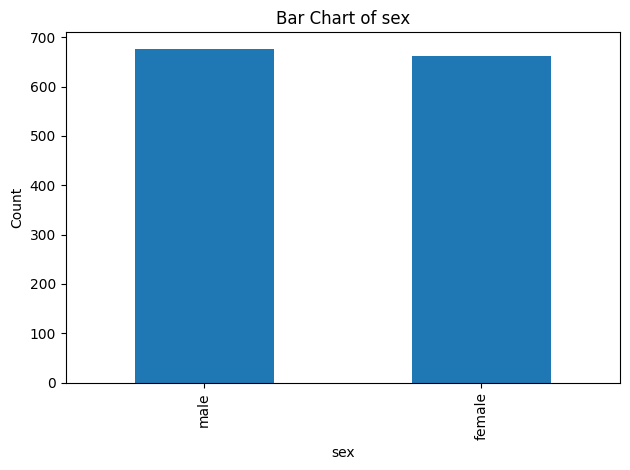

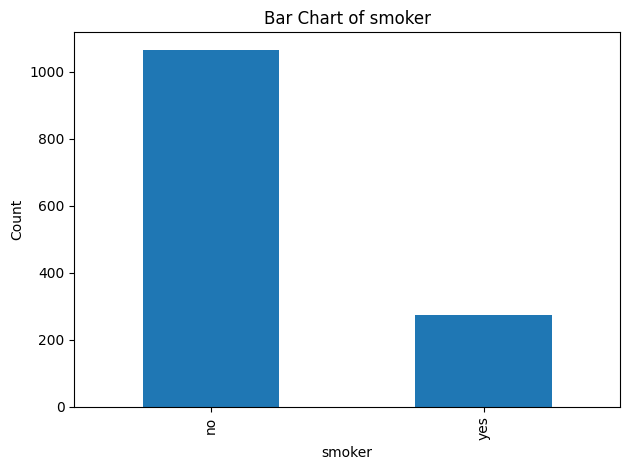

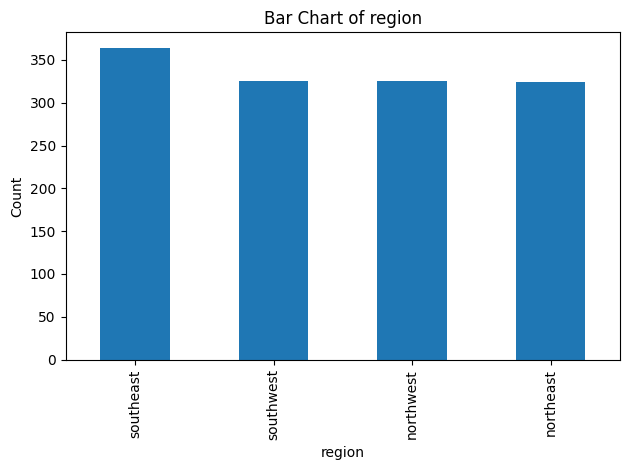

Displayed bar charts inline and logged to MLflow artifacts under 'bar_charts'

Calculating, displaying, and logging correlation matrix...
Logged correlation matrix data to MLflow artifact: correlation_matrix.csv

Correlation matrix:
               age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000


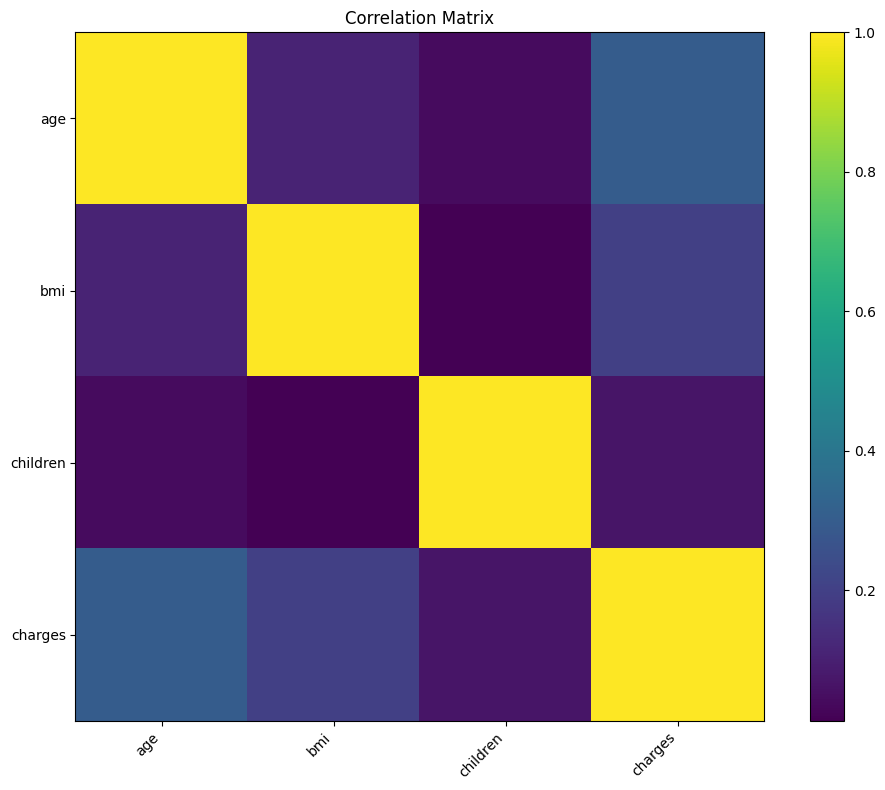

Displayed correlation matrix heatmap inline and logged to MLflow artifacts

Generating, displaying, and logging scatter plots vs 'charges'...


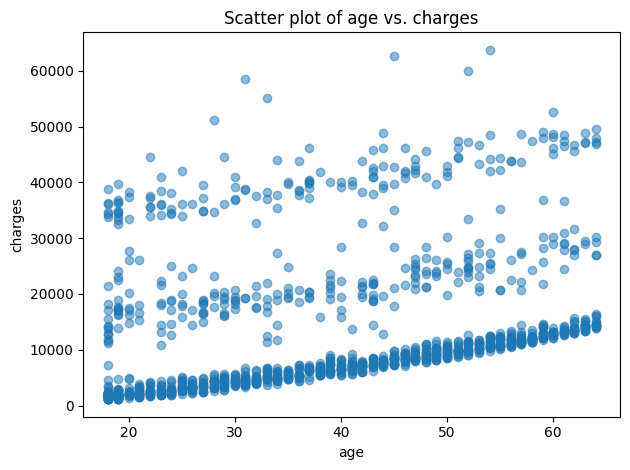

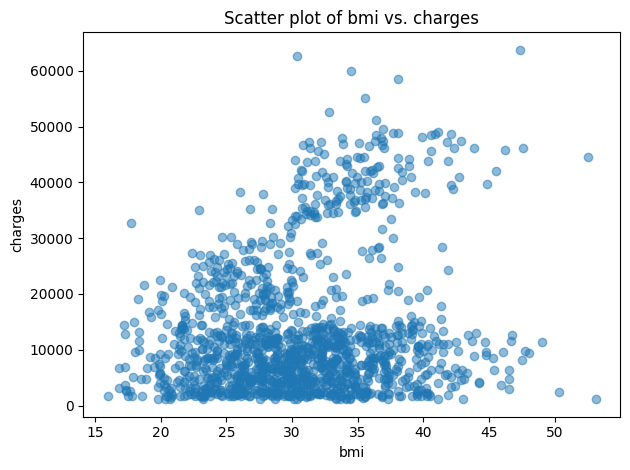

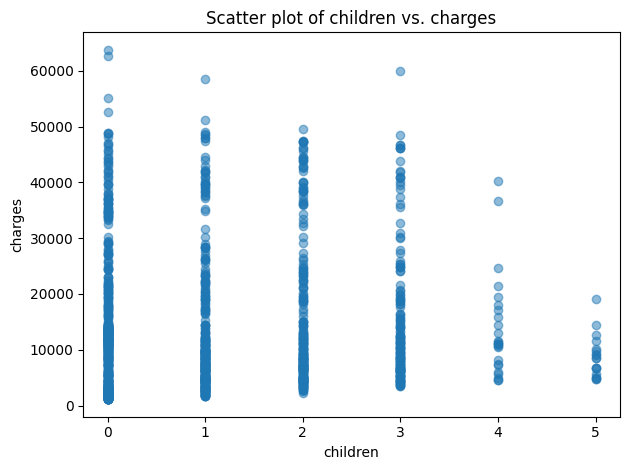

Displayed scatter plots inline and logged to MLflow artifacts under 'scatter_plots'

Generating, displaying, and logging box plots...


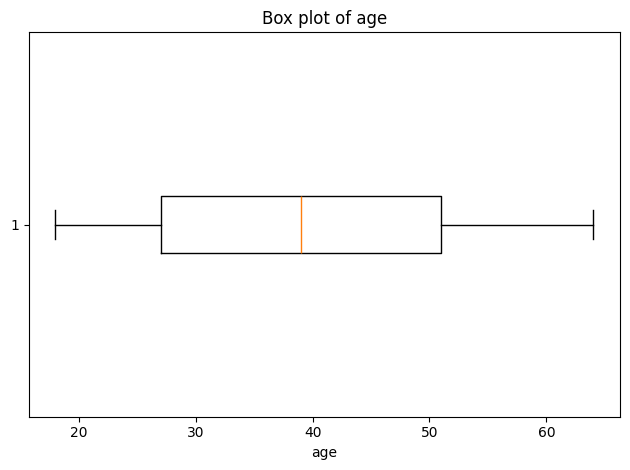

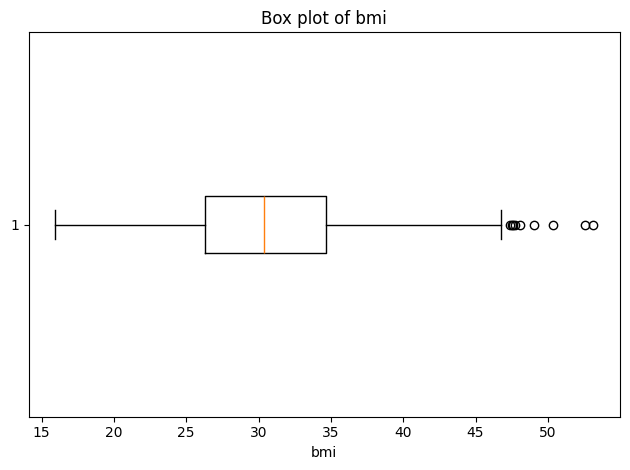

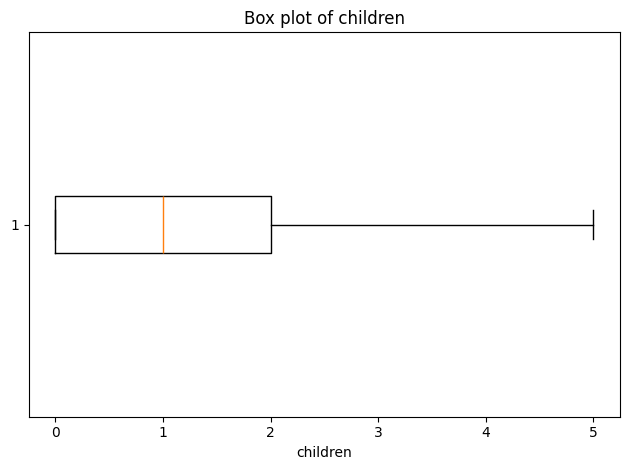

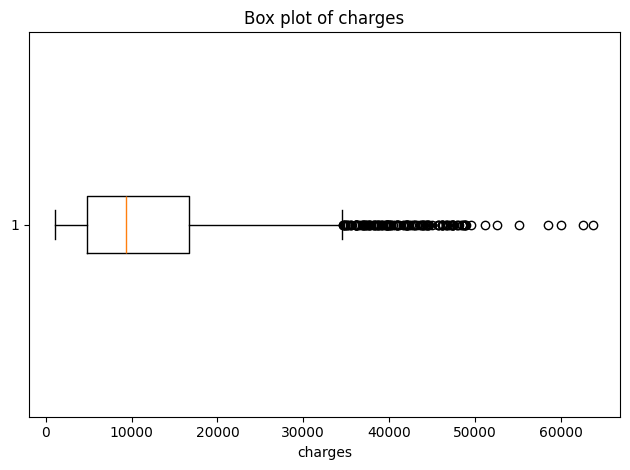

Displayed box plots inline and logged to MLflow artifacts under 'box_plots'

--- Finished EDA: Results visible inline and logged to MLflow ---


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import mlflow # Ensure mlflow is imported
import os # To help with creating directories for artifacts if needed
import io # For capturing text output

# --- IMPORTANT FOR NOTEBOOKS: Ensure inline display is enabled ---
%matplotlib inline

# --- Ensure MLflow Run is Active ---
# (Assuming an MLflow run is already active from previous steps)
# You can check with:
# if mlflow.active_run() is None:
#     mlflow.start_run()
# print(f"Active MLflow Run ID: {mlflow.active_run().info.run_id}")

# Assuming your dataframe 'df' is already loaded

print("--- Starting EDA ---")

# --- Log Summary Statistics, Missing Values, Duplicate Count ---
# (These parts remain the same as the previous example - logging data/metrics)
print("\nCalculating and logging summary statistics...")
summary_stats = df.describe()
summary_stats_path = "summary_statistics.csv"
summary_stats.to_csv(summary_stats_path)
mlflow.log_artifact(summary_stats_path)
print(f"Logged summary statistics to MLflow artifact: {summary_stats_path}")
# Display in notebook as well
print("\nSummary statistics for numerical columns:")
print(summary_stats)

print("\nCalculating and logging missing values...")
missing_values = df.isnull().sum()
missing_values_path = "missing_values.csv"
missing_values.to_frame(name='missing_count').to_csv(missing_values_path)
mlflow.log_artifact(missing_values_path)
print(f"Logged missing values count to MLflow artifact: {missing_values_path}")
# Display in notebook as well
print("\nMissing values in each column:")
print(missing_values)

print("\nCalculating and logging duplicate rows...")
duplicate_count = df.duplicated().sum()
mlflow.log_metric("duplicate_row_count", duplicate_count)
print(f"Logged duplicate row count ({duplicate_count}) to MLflow metrics")
# Display in notebook as well
print(f"Number of duplicate rows: {duplicate_count}")


# --- Identify Column Types ---
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns
print("\nNumerical columns:", num_cols.tolist())
print("Categorical columns:", cat_cols.tolist())
mlflow.log_metric("numerical_column_count", len(num_cols))
mlflow.log_metric("categorical_column_count", len(cat_cols))


# --- Histograms for Numerical Features (Log AND Display) ---
print("\nGenerating, displaying, and logging histograms...")
hist_dir = "histograms"
if not os.path.exists(hist_dir): os.makedirs(hist_dir)

for col in num_cols:
    fig = plt.figure() # Create a new figure
    plt.hist(df[col].dropna(), bins=20, edgecolor='black')
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout() # Adjust layout
    # Log the figure FIRST
    artifact_path = os.path.join(hist_dir, f"histogram_{col}.png")
    mlflow.log_figure(fig, artifact_file=artifact_path)
    # THEN show it inline
    plt.show()
    # FINALLY close it to free memory (especially important in loops)
    plt.close(fig)
print(f"Displayed histograms inline and logged to MLflow artifacts under '{hist_dir}'")


# --- Bar Charts for Categorical Features (Log AND Display) ---
print("\nGenerating, displaying, and logging bar charts...")
bar_dir = "bar_charts"
if not os.path.exists(bar_dir): os.makedirs(bar_dir)

for col in cat_cols:
    fig = plt.figure() # Create a new figure
    df[col].value_counts().plot(kind='bar')
    plt.title(f"Bar Chart of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout() # Adjust layout
    # Log the figure FIRST
    artifact_path = os.path.join(bar_dir, f"barchart_{col}.png")
    mlflow.log_figure(fig, artifact_file=artifact_path)
    # THEN show it inline
    plt.show()
    # FINALLY close it
    plt.close(fig)
print(f"Displayed bar charts inline and logged to MLflow artifacts under '{bar_dir}'")


# --- Correlation Matrix (Log Data, Log AND Display Plot) ---
print("\nCalculating, displaying, and logging correlation matrix...")
corr_matrix = df[num_cols].corr()
# Log correlation matrix data as a CSV artifact
corr_matrix_path = "correlation_matrix.csv"
corr_matrix.to_csv(corr_matrix_path)
mlflow.log_artifact(corr_matrix_path)
print(f"Logged correlation matrix data to MLflow artifact: {corr_matrix_path}")
# Display correlation matrix data in notebook
print("\nCorrelation matrix:")
print(corr_matrix)

# Visualize and log the correlation matrix heatmap
fig_corr = plt.figure(figsize=(10, 8)) # Adjust figure size for better readability
plt.imshow(corr_matrix, interpolation='nearest', cmap='viridis')
plt.title("Correlation Matrix")
plt.colorbar()
tick_marks = range(len(num_cols))
plt.xticks(tick_marks, num_cols, rotation=45, ha='right')
plt.yticks(tick_marks, num_cols)
plt.tight_layout() # Adjust layout
# Log the heatmap figure FIRST
mlflow.log_figure(fig_corr, artifact_file="correlation_matrix_heatmap.png")
# THEN show it inline
plt.show()
# FINALLY close it
plt.close(fig_corr)
print("Displayed correlation matrix heatmap inline and logged to MLflow artifacts")


# --- Scatter Plots (vs. 'charges') (Log AND Display) ---
if 'charges' in df.columns:
    print("\nGenerating, displaying, and logging scatter plots vs 'charges'...")
    scatter_dir = "scatter_plots"
    if not os.path.exists(scatter_dir): os.makedirs(scatter_dir)

    for col in num_cols:
        if col != 'charges':
            fig = plt.figure() # Create a new figure
            plt.scatter(df[col], df['charges'], alpha=0.5)
            plt.title(f"Scatter plot of {col} vs. charges")
            plt.xlabel(col)
            plt.ylabel("charges")
            plt.tight_layout()
            # Log the figure FIRST
            artifact_path = os.path.join(scatter_dir, f"scatter_{col}_vs_charges.png")
            mlflow.log_figure(fig, artifact_file=artifact_path)
            # THEN show it inline
            plt.show()
            # FINALLY close it
            plt.close(fig)
    print(f"Displayed scatter plots inline and logged to MLflow artifacts under '{scatter_dir}'")
else:
    print("\n'charges' column not found, skipping scatter plots.")


# --- Box Plots for Numerical Features (Log AND Display) ---
print("\nGenerating, displaying, and logging box plots...")
box_dir = "box_plots"
if not os.path.exists(box_dir): os.makedirs(box_dir)

for col in num_cols:
    fig = plt.figure() # Create a new figure
    plt.boxplot(df[col].dropna(), vert=False)
    plt.title(f"Box plot of {col}")
    plt.xlabel(col)
    plt.tight_layout()
    # Log the figure FIRST
    artifact_path = os.path.join(box_dir, f"boxplot_{col}.png")
    mlflow.log_figure(fig, artifact_file=artifact_path)
    # THEN show it inline
    plt.show()
    # FINALLY close it
    plt.close(fig)
print(f"Displayed box plots inline and logged to MLflow artifacts under '{box_dir}'")


print("\n--- Finished EDA: Results visible inline and logged to MLflow ---")

# Optional: End the run if you started it specifically for this EDA
# 

### 🧱 Feature Separation for Model Input

- **Separates the target variable `charges` from the feature set `X`**
- **Identifies categorical features using data types `object` or `category`**
- **Identifies numerical features using data types `int64` or `float64`**
- **Prints the list of categorical and numerical columns for reference**

In [6]:
X = df.drop('charges', axis=1)
y = df['charges']

categorical_features = X.select_dtypes(include=['object', 'category']).columns
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns

print(f"Categorical features: {list(categorical_features)}")
print(f"Numerical features: {list(numerical_features)}")

Categorical features: ['sex', 'smoker', 'region']
Numerical features: ['age', 'bmi', 'children']


### 📝 MLflow Logging for Feature Metadata

- **Logs the target column name as a parameter**
- **Logs the total number of input features as a metric**
- **Logs counts of numerical and categorical features as separate metrics**
- **Saves and logs lists of numerical and categorical features as text artifacts under `feature_info/`**
- **Prints confirmation once logging is complete**

In [7]:
# --- MLflow Logging Cell ---

# Log details about the features and target
mlflow.log_param("target_column", y.name)
mlflow.log_metric("input_feature_count", X.shape[1])
mlflow.log_metric("input_numerical_feature_count", len(numerical_features))
mlflow.log_metric("input_categorical_feature_count", len(categorical_features))

# Log the lists of features as artifacts (optional, can be verbose)
with open("numerical_features.txt", "w") as f:
    f.write("\n".join(numerical_features))
mlflow.log_artifact("numerical_features.txt", artifact_path="feature_info")

with open("categorical_features.txt", "w") as f:
    f.write("\n".join(categorical_features))
mlflow.log_artifact("categorical_features.txt", artifact_path="feature_info")

print("Logged feature/target info and feature lists to MLflow.")

Logged feature/target info and feature lists to MLflow.


### ⚙️ Defining a Column-wise Preprocessing Pipeline

- **Uses `StandardScaler`** to normalize numerical features.  
- **Applies `OneHotEncoder`** to categorical features with `handle_unknown='ignore'` to avoid errors from unseen categories.  
- **Combines both transformations** using `ColumnTransformer` to apply them to the respective columns.  
- **Sets `remainder='passthrough'`** to keep any extra columns, although none are expected in this case.  
- **Prints confirmation** and displays the preprocessor structure for inspection.

In [8]:
# --- User Code Cell ---
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False) # Set sparse_output=False for easier inspection later if needed

preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, numerical_features),
            ('cat', categorical_transformer, categorical_features)
        ],
        remainder='passthrough' # Keep other columns (if any) - should be none here
    )

print("Preprocessor defined.")
# Display the preprocessor structure
preprocessor

Preprocessor defined.


ColumnTransformer(remainder='passthrough',
                  transformers=[('num', StandardScaler(),
                                 Index(['age', 'bmi', 'children'], dtype='object')),
                                ('cat',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse_output=False),
                                 Index(['sex', 'smoker', 'region'], dtype='object'))])

### 📝 Logging Preprocessing Configuration to MLflow

- **Logs the type of numerical transformer** (e.g., `StandardScaler`).  
- **Logs the type of categorical transformer** (e.g., `OneHotEncoder`).  
- **Logs all parameters of the categorical transformer**, such as `handle_unknown`.  
- **Logs the `remainder` setting** of the `ColumnTransformer` (e.g., `'passthrough'`).  
- **Prints confirmation** once all preprocessing parameters are logged to MLflow.

In [9]:
# --- MLflow Logging Cell ---

# Log parameters related to the preprocessing steps
mlflow.log_param("numerical_transformer", numerical_transformer.__class__.__name__)
mlflow.log_param("categorical_transformer", categorical_transformer.__class__.__name__)
mlflow.log_params(categorical_transformer.get_params()) # Logs params like handle_unknown
mlflow.log_param("coltransformer_remainder", preprocessor.remainder)

print("Logged preprocessor definition parameters to MLflow.")

Logged preprocessor definition parameters to MLflow.


### ✂️ Splitting the Dataset into Training and Test Sets

- **Uses `train_test_split`** to split the features (`X`) and target (`y`) into training and testing sets.  
- **Allocates 20% of the data to the test set** (`test_size=0.2`) for evaluation.  
- **Sets `random_state=42`** to ensure reproducibility of the split.  
- **Prints the number of samples** in both the training and test sets.

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 1070
Test set size: 268


### 📝 Logging Train/Test Split Details to MLflow

- **Logs the test split ratio** used during data splitting (`0.2`).  
- **Logs the `random_state`** to ensure reproducibility (`42`).  
- **Logs the number of samples in the training set** as a metric.  
- **Logs the number of samples in the test set** as a metric.  
- **Prints confirmation** after successful logging to MLflow.

In [11]:
# --- MLflow Logging Cell ---

# Log train/test split parameters and resulting sizes
mlflow.log_param("test_split_ratio", 0.2)
mlflow.log_param("split_random_state", 42)
mlflow.log_metric("training_set_size", X_train.shape[0])
mlflow.log_metric("test_set_size", X_test.shape[0])

print("Logged train/test split info to MLflow.")

Logged train/test split info to MLflow.


### ⚙️ Fitting the Preprocessor on Training Data

- **Fits the preprocessing pipeline only on `X_train`** to prevent data leakage.  
- Ensures that **scaling and encoding** are learned from training data alone.  
- **Prints confirmation** before and after fitting to track progress.

In [13]:
# IMPORTANT: Fit the preprocessor on the training data ONLY
print("Fitting preprocessor on training data...")
preprocessor.fit(X_train)
print("Preprocessor fitted.")

Fitting preprocessor on training data...
Preprocessor fitted.


### 🧠 Logging the Fitted Preprocessor to MLflow

- **Uses `mlflow.sklearn.log_model()`** to log the fitted `ColumnTransformer` as a reusable MLflow model artifact.  
- Stores the preprocessor under the specified artifact path: `"preprocessor"`.  
- Optionally, provides a **joblib-based alternative** for logging (less metadata, more manual).  
- **Prints confirmation** after the fitted preprocessor is successfully logged.

When we use `mlflow.sklearn.log_model` (or logging functions for other frameworks), MLflow doesn't just save the raw model file (like a `.pkl`). It saves a **directory** containing the model along with crucial **metadata** that makes the model understandable, reproducible, and deployable. This standardized directory format is called an "MLflow Model".


```bash
thsklk@thsklk0 MINGW64 ~/Downloads/Job_plucky_ship_5j3s7rh9_OutputsAndLogs
$ ls -lhtr
total 74K
drwxr-xr-x 1 thsklk 1049089   0 Apr 12 18:59 bar_charts/
drwxr-xr-x 1 thsklk 1049089   0 Apr 12 18:59 box_plots/
-rw-r--r-- 1 thsklk 1049089 303 Apr 12 18:59 correlation_matrix.csv
-rw-r--r-- 1 thsklk 1049089 24K Apr 12 18:59 correlation_matrix_heatmap.png
-rw-r--r-- 1 thsklk 1049089 520 Apr 12 18:59 data_info.txt
-rw-r--r-- 1 thsklk 1049089 241 Apr 12 18:59 data_preview.csv
drwxr-xr-x 1 thsklk 1049089   0 Apr 12 18:59 feature_info/
drwxr-xr-x 1 thsklk 1049089   0 Apr 12 18:59 histograms/
drwxr-xr-x 1 thsklk 1049089   0 Apr 12 18:59 linear-regression-model-v2/
drwxr-xr-x 1 thsklk 1049089   0 Apr 12 18:59 linear-regression-model-v3/
drwxr-xr-x 1 thsklk 1049089   0 Apr 12 18:59 linear-regression-model/
-rw-r--r-- 1 thsklk 1049089  72 Apr 12 18:59 missing_values.csv
drwxr-xr-x 1 thsklk 1049089   0 Apr 12 18:59 preprocessor/
drwxr-xr-x 1 thsklk 1049089   0 Apr 12 18:59 scatter_plots/
-rw-r--r-- 1 thsklk 1049089 369 Apr 12 18:59 summary_statistics.csv

thsklk@thsklk0 MINGW64 ~/Downloads/Job_plucky_ship_5j3s7rh9_OutputsAndLogs
$ ls -lhtr ./linear-regression-model-v3
total 19K
-rw-r--r-- 1 thsklk 1049089 880 Apr 12 18:59 MLmodel
-rw-r--r-- 1 thsklk 1049089 229 Apr 12 18:59 conda.yaml
-rw-r--r-- 1 thsklk 1049089 514 Apr 12 18:59 input_example.json
-rw-r--r-- 1 thsklk 1049089 579 Apr 12 18:59 model.pkl
-rw-r--r-- 1 thsklk 1049089 121 Apr 12 18:59 python_env.yaml
-rw-r--r-- 1 thsklk 1049089 109 Apr 12 18:59 requirements.txt
-rw-r--r-- 1 thsklk 1049089 914 Apr 12 18:59 serving_input_example.json

thsklk@thsklk0 MINGW64 ~/Downloads/Job_plucky_ship_5j3s7rh9_OutputsAndLogs
$ ls -lhtr ./preprocessor/
total 11K
-rw-r--r-- 1 thsklk 1049089  340 Apr 12 18:59 MLmodel
-rw-r--r-- 1 thsklk 1049089  229 Apr 12 18:59 conda.yaml
-rw-r--r-- 1 thsklk 1049089 2.0K Apr 12 18:59 model.pkl
-rw-r--r-- 1 thsklk 1049089  121 Apr 12 18:59 python_env.yaml
-rw-r--r-- 1 thsklk 1049089  109 Apr 12 18:59 requirements.txt
```


Here's what each file typically does:

1.  **`model.pkl`**
    * **Purpose:** This is the core serialized model object itself. Since we used `mlflow.sklearn.log_model`, this file contains the actual trained Scikit-learn object (our `LinearRegression` instance or `ColumnTransformer` preprocessor) saved using Python's `pickle` serialization (or sometimes `joblib`). It holds the learned parameters, transformations, etc.

2.  **`MLmodel` (YAML file)**
    * **Purpose:** This is the **most important metadata file**. It acts as the descriptor for the saved MLflow Model. MLflow tools read this file first to understand everything else.
    * **Contents:**
        * **Flavors:** Defines how the model can be loaded and used. We'll typically see at least two flavors here:
            * `sklearn`: Specific information for loading as a Scikit-learn object (e.g., `sklearn_version`, path to `model.pkl`, serialization format).
            * `python_function` (or `pyfunc`): A generic Python wrapper. This allows loading the model with a consistent `.predict()` interface regardless of the original framework, making it great for deployment. It specifies the loader module and environment details.
        * **Environment:** References the environment definition files (`conda.yaml`, `python_env.yaml`).
        * **Signature:** (Optional but recommended) If you logged the model with a signature, it's defined here, detailing the expected input and output schemas.
        * **Input Example:** (Optional) References the `input_example.json` file if provided.
        * **Timestamp, Run ID, etc.:** Other metadata about when and where the model was logged.

```ymal
artifact_path: linear-regression-model-v3
flavors:
  python_function:
    env:
      conda: conda.yaml
      virtualenv: python_env.yaml
    loader_module: mlflow.sklearn
    model_path: model.pkl
    predict_fn: predict
    python_version: 3.10.14
  sklearn:
    code: null
    pickled_model: model.pkl
    serialization_format: cloudpickle
    sklearn_version: 1.5.2
mlflow_version: 2.16.2
model_size_bytes: 2007
model_uuid: 5d14542141604f1d8f2681a1f14ef3a4
run_id: 53f6bb6b-eabc-4faa-ae8c-cc1e784b989d
saved_input_example_info:
  artifact_path: input_example.json
  serving_input_path: serving_input_example.json
  type: ndarray
signature:
  inputs: '[{"type": "tensor", "tensor-spec": {"dtype": "float64", "shape": [-1, 11]}}]'
  outputs: '[{"type": "tensor", "tensor-spec": {"dtype": "float64", "shape": [-1]}}]'
  params: null
utc_time_created: '2025-04-12 12:47:23.295875'
```


3.  **`conda.yaml`**
    * **Purpose:** Defines a Conda environment needed to run the model.
    * **Contents:** Lists all necessary Python libraries (like `scikit-learn`, `pandas`, `mlflow` itself) with their specific versions, plus the Python version. This ensures that the model can be loaded and run in an environment identical to the one it was trained in, preventing dependency issues.

4.  **`python_env.yaml`**
    * **Purpose:** Similar to `conda.yaml`, this file also defines the required Python environment, often focusing on a format compatible with `pip` and virtual environments used by the `pyfunc` flavor internally. In recent MLflow versions, its content might overlap significantly or be identical to `conda.yaml`.

5.  **`requirements.txt`**
    * **Purpose:** Provides the same dependency information as `conda.yaml` but in the standard `pip` requirements file format.
    * **Benefit:** Gives you flexibility to recreate the environment using `pip install -r requirements.txt` if you prefer that over Conda.

6.  **`input_example.json`** (Appears in `linear-regression-model-v3`)
    * **Purpose:** Stores the sample input data you provided via the `input_example` argument when logging the model.
    * **Format:** Usually JSON, often in pandas "split" orientation (`{"columns": [...], "data": [[...], ...]}"`).
    * **Use:** Helps users understand the expected input data structure and provides a handy example for testing the loaded model.

7.  **`serving_input_example.json`** (Appears in `linear-regression-model-v3`)
    * **Purpose:** Often similar or identical to `input_example.json`. Sometimes it might be formatted specifically for certain model serving platforms (like Azure ML endpoints) that expect a particular input JSON structure.

In [14]:
# --- MLflow Logging Cell ---
import mlflow.sklearn # Ensure sklearn flavor is imported
import joblib # Alternative for generic artifact logging

# Log the FITTED preprocessor object as an artifact
# Option 1: Using MLflow's scikit-learn flavor (RECOMMENDED)
preprocessor_artifact_path = "preprocessor"
mlflow.sklearn.log_model(preprocessor, artifact_path=preprocessor_artifact_path)
print(f"Logged fitted preprocessor using mlflow.sklearn to path: {preprocessor_artifact_path}")

# Option 2: Using joblib directly (Less metadata than option 1)
# preprocessor_file = "preprocessor.joblib"
# joblib.dump(preprocessor, preprocessor_file)
# mlflow.log_artifact(preprocessor_file)
# print(f"Logged fitted preprocessor using joblib artifact: {preprocessor_file}")

2025/04/12 11:56:19 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
2025/04/12 11:56:24 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Logged fitted preprocessor using mlflow.sklearn to path: preprocessor


### 🔄 Transforming Data with the Fitted Preprocessor

- **Applies the fitted `preprocessor`** to both the training and test sets.  
- **Prints the shape** of the transformed datasets to confirm feature expansion (especially after one-hot encoding).  
- Attempts to **extract feature names** after transformation using `get_feature_names_out()` from the OneHotEncoder.  
- Combines the original numerical feature names with the one-hot encoded feature names.  
- **Handles errors gracefully** if feature names can't be extracted.

In [15]:
# Now transform both train and test sets
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)
print(f"Shape of processed training data: {X_train_processed.shape}")
print(f"Shape of processed test data: {X_test_processed.shape}")

# Get feature names after one-hot encoding
try:
    # For ColumnTransformer with named transformers
    ohe_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
    processed_feature_names = list(numerical_features) + list(ohe_feature_names)
    print(f"Number of features after processing: {len(processed_feature_names)}")
    # print("Processed feature names:", processed_feature_names) # Can be very long
except AttributeError:
    processed_feature_names = None
    print("Could not automatically extract feature names after processing.")

Shape of processed training data: (1070, 11)
Shape of processed test data: (268, 11)
Number of features after processing: 11


### 📊 Logging Processed Feature Info to MLflow

- **Logs the total number of features** after preprocessing as a metric.  
- **If available**, saves the list of processed feature names to a text file and logs it as an artifact under `feature_info/`.  
- **Prints confirmation** indicating whether both the count and feature names were logged, or just the count.

In [16]:
# --- MLflow Logging Cell ---

# Log the number of features after processing
mlflow.log_metric("processed_feature_count", X_train_processed.shape[1])

# Log the processed feature names list (if available) as an artifact
if processed_feature_names:
    with open("processed_feature_names.txt", "w") as f:
        f.write("\n".join(processed_feature_names))
    mlflow.log_artifact("processed_feature_names.txt", artifact_path="feature_info")
    print("Logged processed feature count and feature names list to MLflow.")
else:
     print("Logged processed feature count to MLflow. Feature names not logged.")

Logged processed feature count and feature names list to MLflow.


### 🤖 Training a Linear Regression Model

- **Initializes a `LinearRegression` model** from scikit-learn.  
- **Fits the model using the preprocessed training data** (`X_train_processed`, `y_train`).  
- **Prints progress messages** before and after training to indicate completion.

In [17]:
# --- User Code Cell ---
from sklearn.linear_model import LinearRegression

print("Training Linear Regression model...")
model = LinearRegression()
model.fit(X_train_processed, y_train)
print("Model training complete.")

Training Linear Regression model...
Model training complete.


### 📝 Logging a Trained Model with Signature and Example to MLflow

- **Sets a tag** for the model type (`LinearRegression`) to categorize the run.  
- **Logs model parameters** (e.g., `fit_intercept`) to keep track of its configuration.  
- **Infers the model signature** using `infer_signature()` to capture input/output schema for deployment.  
- **Logs the model artifact** using `mlflow.sklearn.log_model()` with:
  - The trained model
  - An example input (`X_train_processed[:5]`)
  - The inferred signature
- **Prints progress updates** for signature inference and model logging.  
- Confirms that logging is complete with a final print statement.

### 🤖 Why MLflow Model Signature Is Important During Inference Serving

The **MLflow model signature** defines the **input and output schema** (shape, type, structure) of your model. It's critical during **inference serving** for several reasons:

🔐 **Validation of Input Data**
- Ensures that **incoming requests match the expected format** (e.g., column names, data types).
- Prevents serving errors due to **missing or misnamed columns** or incorrect data types.


🧪 **Improved Testing & Reproducibility**
- Makes it easy to **test the model locally or in CI/CD pipelines**, because the exact input and output structure is known.
- Enables tools to **simulate or validate requests** without guessing the schema.

⚙️ **Simplifies Deployment**
- Automatically used by MLflow when deploying via **MLflow REST API**, **Azure ML**, or **other serving platforms**.
- Eliminates manual schema documentation or hardcoding input parsing logic in deployment code.

 📦 **Better Model Documentation**
- Signature acts as **metadata** that describes the model contract for developers, ops teams, and consumers.
- Helpful when models are stored and shared in a **model registry**, allowing others to understand how to use them correctly.

 🚫 Avoids Runtime Failures
- Without a signature, if the input format during inference doesn't match what the model expects, it can cause:
  - Model crash
  - Wrong predictions
  - Silent errors (e.g., column order mismatch)

✅ Summary:
**Model signatures act as an automated contract** between your model and the inference system—ensuring consistency, safety, and clarity from training to production.

In [21]:
!pip install --upgrade ipywidgets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 1.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.0/214.0 kB 3.7 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 16.2 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.8
    Uninstalling widgetsnbextension-3.6.8:
      Successfully uninstalled widgetsnbextension-3.6.8
  Attempting uninstall: jupyterlab_widgets
    Found existing installation: jupyterlab_widgets 1.1.9
    Uninstalling jupyterlab_widgets-1.1.9:
      Successfully uninstalled jupyterlab_widgets-1.1.9
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.7.1
    Uninstalling ipywidgets-7.7.1:
      Successfully uninstalled ipywidgets-7.7.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency 

In [22]:
# --- MLflow Logging Cell ---
import mlflow
import mlflow.sklearn
from mlflow.models import infer_signature

# Log model type and parameters
mlflow.set_tag("model_type", model.__class__.__name__) # Using a tag for model type
mlflow.log_params(model.get_params()) # Log default parameters of the model

# Log the TRAINED model using MLflow's scikit-learn flavor
model_artifact_path = "linear-regression-model-v3" # Use a distinct path if logging multiple versions

# --- Option 1: Log WITH signature and input example (Recommended) ---
print(f"Inferring signature for model {model.__class__.__name__}...")
signature = infer_signature(X_train_processed, model.predict(X_train_processed))
print("Logging model with signature...")
mlflow.sklearn.log_model(
    sk_model=model,
    artifact_path=model_artifact_path,
    signature=signature,
    input_example=X_train_processed[:5] # Provide a small sample of input data
)
print(f"Logged trained {model.__class__.__name__} model WITH signature.")

# --- Option 2: Log WITHOUT signature (Comment out if using Option 1) ---
# print("Logging model without signature...")
# mlflow.sklearn.log_model(model, artifact_path=model_artifact_path)
# print(f"Logged trained {model.__class__.__name__} model WITHOUT signature.")


# This final print statement might be slightly inaccurate if Option 2 is used,
# but confirms logging happened. Adjust as needed.
print(f"Completed logging for {model.__class__.__name__} model, parameters, and tags to MLflow.")

Inferring signature for model LinearRegression...
Logging model with signature...


Logged trained LinearRegression model WITH signature.
Completed logging for LinearRegression model, parameters, and tags to MLflow.


### 🔮 Making Predictions on the Test Set

- **Applies the trained model** to the preprocessed test features (`X_test_processed`).  
- **Generates predictions** for the target variable (`charges`).  
- **Prints confirmation** once predictions are successfully generated.  
- *(Optional)* You can uncomment the last lines to compare sample predictions with actual values.

In [23]:
# --- User Code Cell ---

print("Making predictions on the test set...")
y_pred = model.predict(X_test_processed)
print("Predictions generated.")
# print("Sample predictions:", y_pred[:5])
# print("Actual values:", y_test[:5].values)

Making predictions on the test set...
Predictions generated.


### 📈 Evaluating Model Performance on the Test Set

- **Calculates Mean Squared Error (MSE):** Measures average squared difference between predicted and actual values.  
- **Computes Root Mean Squared Error (RMSE):** Easier to interpret since it's in the same unit as the target variable.  
- **Calculates Mean Absolute Error (MAE):** Represents average absolute difference, less sensitive to outliers than MSE.  
- **Computes R-squared (R²):** Indicates how well the model explains the variance in the target variable (1 = perfect).  
- **Prints all metrics** for quick evaluation of model accuracy and error.

In [24]:
# --- User Code Cell ---
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error # Added MAE

mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False) # Calculate RMSE
mae = mean_absolute_error(y_test, y_pred) # Calculate MAE
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 33596915.85136148
Root Mean Squared Error (RMSE): 5796.284659276275
Mean Absolute Error (MAE): 4181.194473753653
R-squared (R2): 0.7835929767120722


/anaconda/envs/azureml_py310_sdkv2/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### 📊 Logging Evaluation Metrics to MLflow

- **Logs test set performance metrics** to MLflow:
  - `mse` (Mean Squared Error)  
  - `rmse` (Root Mean Squared Error)  
  - `mae` (Mean Absolute Error)  
  - `r2` (R-squared Score)  
- These metrics provide insight into model accuracy and error on unseen data.  
- **Prints confirmation** after logging is complete.  
- *(Optional)* You can end the MLflow run if this marks the end of the current experiment session.

In [25]:
# --- MLflow Logging Cell ---

# Log the evaluation metrics
mlflow.log_metric("mse", mse)
mlflow.log_metric("rmse", rmse)
mlflow.log_metric("mae", mae)
mlflow.log_metric("r2", r2)

print("Logged evaluation metrics (MSE, RMSE, MAE, R2) to MLflow.")

Logged evaluation metrics (MSE, RMSE, MAE, R2) to MLflow.


In [26]:
# --- Optional: End the MLflow run if appropriate ---
# If this is the logical end of your experiment for this notebook session
mlflow.end_run()
print("MLflow run ended.")

2025/04/12 13:18:51 INFO mlflow.tracking._tracking_service.client: 🏃 View run plucky_ship_5j3s7rh9 at: https://centralindia.api.azureml.ms/mlflow/v2.0/subscriptions/40b3b6fa-c1eb-4567-bb9c-bfa430b41708/resourceGroups/tharindu-ml-tst-rg/providers/Microsoft.MachineLearningServices/workspaces/tharindu-ml-tst-wp/#/experiments/1e7b4326-7280-4ac6-b120-84a6170ad673/runs/53f6bb6b-eabc-4faa-ae8c-cc1e784b989d.
2025/04/12 13:18:51 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://centralindia.api.azureml.ms/mlflow/v2.0/subscriptions/40b3b6fa-c1eb-4567-bb9c-bfa430b41708/resourceGroups/tharindu-ml-tst-rg/providers/Microsoft.MachineLearningServices/workspaces/tharindu-ml-tst-wp/#/experiments/1e7b4326-7280-4ac6-b120-84a6170ad673.


MLflow run ended.


### 🧪 Managing MLflow Runs with Context Manager

This code demonstrates a clean and safe way to run and track experiments using MLflow:

🧭 1. **Set the Experiment**
- Initializes or switches to an experiment named `"Test1"` using `mlflow.set_experiment()`.
- Ensures all logged data belongs to the correct experiment context.

🚀 2. **Start the Run with a Context Manager**
- Starts an MLflow run using `with mlflow.start_run()`—ensuring the run ends **automatically** when the block finishes, even if an error occurs.
- Retrieves the **run ID** from the `run` object for reference or later usage (e.g., model URI).

📝 3. **Log Parameters, Metrics, or Artifacts**
- Inside the run, you can add any MLflow logging logic (e.g., `mlflow.log_param()`).
- This is where you'd place your model training, evaluation, or data processing code.

✅ 4. **Graceful Run Completion**
- Once outside the `with` block, the run ends cleanly.
- Confirms the run's completion status using `mlflow.get_run(run_id).info.status`.

⚠️ 5. **Optional Error Handling**
- Catches exceptions and prints errors that occur during the run.
- Ensures visibility into issues without needing to manually end the run.

> 💡 Using `with mlflow.start_run()` is best practice—it prevents "run still active" errors and makes your MLflow usage cleaner and safer.

In [1]:
import mlflow
# import mlflow.sklearn # Keep if needed later
# import io # Keep if needed later

# 1. Set the Experiment context (still done outside the run)
experiment_name = "Test1"
mlflow.set_experiment(experiment_name)
print(f"Using Experiment: '{experiment_name}'")

# 2. Start the run using a context manager
print("Starting MLflow run...")
try:
    with mlflow.start_run() as run:  # Use 'with' for automatic start/end
        # 3. Get the Run ID directly from the 'run' object
        run_id = run.info.run_id
        print(f"MLflow Run ID started: {run_id}")

        # --- This is where you would normally put your code ---
        # Example: Log a parameter
        mlflow.log_param("example_param", "value1")
        print("Logged an example parameter.")
        # -------------------------------------------------------

        print("Work within the run would happen here.")

    # 4. Run automatically ends when exiting the 'with' block
    print(f"MLflow Run ({run_id}) finished with status: {mlflow.get_run(run_id).info.status}")

except Exception as e:
    # Optional: Add error handling for issues during run start or execution
    print(f"An error occurred during the MLflow run: {e}")
    # Ensure run ends even if error happens within the 'with' block (handled by 'with')
    # but you might want specific error logging here.

/anaconda/envs/azureml_py310_sdkv2/lib/python3.10/site-packages/azureml/mlflow/_protos/aml_service_pb2.py:10: UserWarning: google.protobuf.service module is deprecated. RPC implementations should provide code generator plugins which generate code specific to the RPC implementation. service.py will be removed in Jan 2025
  from google.protobuf import service as _service


Using Experiment: 'Test1'
Starting MLflow run...
MLflow Run ID started: 462e0b43-09d4-4015-aa34-89e6c842b014


2025/04/12 16:36:10 INFO mlflow.tracking._tracking_service.client: 🏃 View run affable_floor_9g3p2387 at: https://centralindia.api.azureml.ms/mlflow/v2.0/subscriptions/40b3b6fa-c1eb-4567-bb9c-bfa430b41708/resourceGroups/tharindu-ml-tst-rg/providers/Microsoft.MachineLearningServices/workspaces/tharindu-ml-tst-wp/#/experiments/e0dab42c-1159-44e8-99fa-5623b4e2405b/runs/462e0b43-09d4-4015-aa34-89e6c842b014.
2025/04/12 16:36:10 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://centralindia.api.azureml.ms/mlflow/v2.0/subscriptions/40b3b6fa-c1eb-4567-bb9c-bfa430b41708/resourceGroups/tharindu-ml-tst-rg/providers/Microsoft.MachineLearningServices/workspaces/tharindu-ml-tst-wp/#/experiments/e0dab42c-1159-44e8-99fa-5623b4e2405b.


Logged an example parameter.
Work within the run would happen here.
MLflow Run (462e0b43-09d4-4015-aa34-89e6c842b014) finished with status: FINISHED


### 📋 Listing All MLflow Experiments

This code connects to the MLflow tracking server and lists all existing experiments in the workspace.

- **Initializes an `MlflowClient`** to interact with the MLflow tracking server.  
- **Retrieves all experiments** using `client.search_experiments()`.  
- **Loops through the list** and prints each experiment's name and ID.

> 💡 Knowing the `experiment_id` is helpful when filtering runs or managing experiments programmatically.

In [1]:
# First, import the necessary libraries
import mlflow
from mlflow.tracking import MlflowClient

# Connect to the workspace's MLflow tracking URI
client = MlflowClient()

# 1. List all experiments
experiments = client.search_experiments()
for experiment in experiments:
    print(f"Experiment Name: {experiment.name}, Experiment ID: {experiment.experiment_id}")

/anaconda/envs/azureml_py310_sdkv2/lib/python3.10/site-packages/azureml/mlflow/_protos/aml_service_pb2.py:10: UserWarning: google.protobuf.service module is deprecated. RPC implementations should provide code generator plugins which generate code specific to the RPC implementation. service.py will be removed in Jan 2025
  from google.protobuf import service as _service


Experiment Name: Default, Experiment ID: 1e7b4326-7280-4ac6-b120-84a6170ad673
Experiment Name: Test1, Experiment ID: e0dab42c-1159-44e8-99fa-5623b4e2405b


### 🔍 Retrieving Details for a Specific MLflow Experiment

This snippet fetches and displays detailed information about an MLflow experiment by its name:

- **Uses `get_experiment_by_name()`** to find an experiment with the specified name (`"Test1"`).  
- If found, it prints:
  - **Name** of the experiment  
  - **Experiment ID**  
  - **Artifact location** (where outputs are stored)  
  - **Tags** (any custom metadata)  
  - **Lifecycle stage** (e.g., `active`, `deleted`)

> 💡 Useful for verifying experiment setup or inspecting metadata before querying runs or logging new data.

In [2]:
# 2. Get details for a specific experiment (by name or ID)
experiment_name = "Test1"
experiment = client.get_experiment_by_name(experiment_name)

if experiment:
    print(f"Experiment Details:\n"
          f"  Name: {experiment.name}\n"
          f"  ID: {experiment.experiment_id}\n"
          f"  Artifact Location: {experiment.artifact_location}\n"
          f"  Tags: {experiment.tags}\n"
          f"  Lifecycle Stage: {experiment.lifecycle_stage}")

Experiment Details:
  Name: Test1
  ID: e0dab42c-1159-44e8-99fa-5623b4e2405b
  Artifact Location: 
  Tags: {}
  Lifecycle Stage: active


### 📂 Listing All Runs for a Specific MLflow Experiment

This code retrieves and displays all runs associated with a given experiment:

- **Uses `client.search_runs()`** to fetch all runs under the specified experiment ID.  
- **Iterates through each run**, extracting key info:
  - **Run ID**
  - **Run status** (e.g., `FINISHED`, `FAILED`)
  - **Run name** (if set)
  - **End time**, converted from milliseconds to a human-readable UTC timestamp

> 💡 Helpful for tracking run history, debugging failed runs, or identifying the best-performing models.

In [3]:
from datetime import datetime, timezone

# 3. List all runs for a specific experiment
runs = client.search_runs(experiment_ids=[experiment.experiment_id])
for run in runs:
    # Convert the end_time (in milliseconds) to a datetime object
    end_time = datetime.fromtimestamp(run.info.end_time / 1000, tz=timezone.utc)
    print(f"Run ID: {run.info.run_id}, Status: {run.info.status}, Name: {run.info.run_name}, End time: {end_time}")

Run ID: f4964059-4cb1-4724-9763-6a9ef6170798, Status: FINISHED, Name: dreamy_oyster_10y71h2v, End time: 2025-04-12 15:01:46.112000+00:00
Run ID: 462e0b43-09d4-4015-aa34-89e6c842b014, Status: FINISHED, Name: affable_floor_9g3p2387, End time: 2025-04-12 16:36:10.393000+00:00


### 🧾 Retrieving Detailed Information for a Specific MLflow Run

This code fetches and displays metadata and results for a specific MLflow run using its `run_id`:

- **Uses `client.get_run()`** to retrieve the run by its ID.  
- **Prints detailed run information**, including:
  - **Status** (e.g., `FINISHED`, `FAILED`)  
  - **Start and end timestamps** (in milliseconds since epoch)  
  - **Logged metrics** (e.g., RMSE, MAE)  
  - **Parameters** used during the run (e.g., model type, hyperparameters)  
  - **Tags**, including model type, version, or any custom labels

> 💡 This is especially useful for auditing, comparing experiments, or reviewing past model training runs.

In [4]:
# 4. Get detailed information about a specific run
run_id = "53f6bb6b-eabc-4faa-ae8c-cc1e784b989d"
run = client.get_run(run_id)

print(f"Run Details for {run_id}:\n"
      f"  Status: {run.info.status}\n"
      f"  Start Time: {run.info.start_time}\n"
      f"  End Time: {run.info.end_time}\n"
      f"  Metrics: {run.data.metrics}\n"
      f"  Parameters: {run.data.params}\n"
      f"  Tags: {run.data.tags}")

Run Details for 53f6bb6b-eabc-4faa-ae8c-cc1e784b989d:
  Status: FINISHED
  Start Time: 1744458750422
  End Time: 1744463931798
  Metrics: {'num_rows_loaded': 1338.0, 'num_columns_loaded': 7.0, 'duplicate_row_count': 1.0, 'numerical_column_count': 4.0, 'categorical_column_count': 3.0, 'input_feature_count': 6.0, 'input_numerical_feature_count': 3.0, 'input_categorical_feature_count': 3.0, 'training_set_size': 1070.0, 'test_set_size': 268.0, 'processed_feature_count': 11.0, 'mse': 33596915.85136148, 'rmse': 5796.284659276275, 'mae': 4181.194473753653, 'r2': 0.7835929767120722}
  Parameters: {'data_asset_name': 'insurance-public-url', 'data_asset_version': '1', 'data_asset_path': 'https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv', 'target_column': 'charges', 'numerical_transformer': 'StandardScaler', 'categorical_transformer': 'OneHotEncoder', 'categories': 'auto', 'drop': 'None', 'dtype': "<class 'numpy.float64'>", 'feature_name_combiner': 'co

In [5]:
# 5. Advanced filtering of runs using query syntax
filtered_runs = client.search_runs(
    experiment_ids=[experiment.experiment_id],
    filter_string="metrics.mse > 1 and tags.mlflow.runName = 'my-run'"
)

### 📦 Retrieving Artifacts from a Specific MLflow Run

This code lists the artifacts (files and folders) stored for a particular run:

- **Uses `client.list_artifacts(run_id)`** to get all artifacts logged during the run.  
- **Iterates through each artifact**, printing:
  - **Path** to the artifact within the run's artifact directory  
  - **File size** in bytes

> 💡 Useful for exploring outputs like saved models, plots, logs, and custom files generated during the run.

In [6]:
# 6. Retrieve artifacts for a specific run
artifacts = client.list_artifacts(run_id)
for artifact in artifacts:
    print(f"Artifact: {artifact.path}, Size: {artifact.file_size} bytes")

Artifact: bar_charts, Size: -1 bytes
Artifact: box_plots, Size: -1 bytes
Artifact: correlation_matrix.csv, Size: -1 bytes
Artifact: correlation_matrix_heatmap.png, Size: -1 bytes
Artifact: data_info.txt, Size: -1 bytes
Artifact: data_preview.csv, Size: -1 bytes
Artifact: feature_info, Size: -1 bytes
Artifact: histograms, Size: -1 bytes
Artifact: linear-regression-model-v2, Size: -1 bytes
Artifact: linear-regression-model-v3, Size: -1 bytes
Artifact: linear-regression-model, Size: -1 bytes
Artifact: missing_values.csv, Size: -1 bytes
Artifact: preprocessor, Size: -1 bytes
Artifact: scatter_plots, Size: -1 bytes
Artifact: summary_statistics.csv, Size: -1 bytes


### 📥 Downloading and Loading an Artifact from an MLflow Run

This code demonstrates how to retrieve a logged CSV artifact from a specific MLflow run and load it into a Pandas DataFrame:

1. **Sets the run ID** (`YOUR_RUN_ID`) to identify the run containing the artifact.
2. **Downloads the `data_preview.csv` file** using `client.download_artifacts()`, which returns the local file path.
3. **Reads the CSV file** into a Pandas DataFrame using `pd.read_csv()`.
4. **Prints the location** where the file was saved and displays the preview data.

> 💡 This is especially useful for reviewing data snapshots or model input examples saved during an MLflow experiment.

In [1]:
import pandas as pd
import mlflow.sklearn

# 1. Define your run ID
YOUR_RUN_ID = "53f6bb6b-eabc-4faa-ae8c-cc1e784b989d"

# 2. Download the data_preview.csv artifact
client = mlflow.tracking.MlflowClient()
data_preview_path = client.download_artifacts(YOUR_RUN_ID, "data_preview.csv")
print(f"Downloaded data preview to: {data_preview_path}")

# 3. Load the data into a pandas DataFrame
data = pd.read_csv(data_preview_path)
data

/anaconda/envs/azureml_py310_sdkv2/lib/python3.10/site-packages/azureml/mlflow/_protos/aml_service_pb2.py:10: UserWarning: google.protobuf.service module is deprecated. RPC implementations should provide code generator plugins which generate code specific to the RPC implementation. service.py will be removed in Jan 2025
  from google.protobuf import service as _service
/anaconda/envs/azureml_py310_sdkv2/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm

Downloaded data preview to: /tmp/tmpodvskgf4/data_preview.csv


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### 🔄 Loading Logged Models from a Specific MLflow Run

This code loads the **trained linear regression model** and its **preprocessing pipeline** from a specific MLflow run:

1. **Constructs the model URIs** using the provided `run_id` and artifact paths:
   - `linear-regression-model-v3`
   - `preprocessor`
2. **Loads both models** using `mlflow.sklearn.load_model()`, making them ready for inference.
3. Both returned objects behave like standard scikit-learn estimators and can be used directly for transformation and prediction.

> 💡 This allows you to **reproduce predictions** exactly as they were made during the original experiment.

In [2]:
# 4. Load the ML models
model_uri_lr = f"runs:/{YOUR_RUN_ID}/linear-regression-model-v3"
model_uri_preprocessor = f"runs:/{YOUR_RUN_ID}/preprocessor"

loaded_lr_model = mlflow.sklearn.load_model(model_uri_lr)
loaded_preprocessor = mlflow.sklearn.load_model(model_uri_preprocessor)

### 🤖 Preprocessing and Making Predictions with Loaded MLflow Models

This code completes the **inference workflow** using artifacts from a previous MLflow run:
 🔍 **Step 1: Prepare the Input Data**
- Checks if the **target column (`charges`)** exists in the dataset.
- If present, it’s **dropped from the input features** before transformation.

🧼 **Step 2: Apply Preprocessing**
- Uses the **loaded preprocessor** to transform the raw features into the format expected by the model.

 📈 **Step 3: Generate Predictions**
- Uses the **loaded linear regression model** to predict `charges` from the processed features.

 📋 **Step 4: Compile and Display Results**
- Combines the input data and predictions into a new DataFrame.
- If actual `charges` values are present, includes them and computes the **difference** from predictions.

> ✅ This is a complete, reproducible pipeline for **serving predictions using MLflow-logged models**. Perfect for model evaluation, comparison, or deploying as part of a scoring service.

In [8]:
# 5. Preprocess and make predictions
# First, check if the target column is in the data and remove it if present
target_column = "charges"  # Adjust if your target column has a different name
X = data.drop(target_column, axis=1) if target_column in data.columns else data

# Apply preprocessing and prediction
X_processed = loaded_preprocessor.transform(X)
predictions = loaded_lr_model.predict(X_processed)

# 6. Display the results
result_df = X.copy()
result_df['predicted_charges'] = predictions
if target_column in data.columns:
    result_df['actual_charges'] = data[target_column]
    result_df['difference'] = result_df['actual_charges'] - result_df['predicted_charges']

result_df

,age,sex,bmi,children,smoker,region,predicted_charges,actual_charges,difference
0,19,female,27.900,0,yes,southwest,25197.531061,16884.92400,-8312.607061
1,18,male,33.770,1,no,southeast,3826.781929,1725.55230,-2101.229629
2,28,male,33.000,3,no,southeast,6987.535290,4449.46200,-2538.073290
3,33,male,22.705,0,no,northwest,3813.396616,21984.47061,18171.073994
4,32,male,28.880,0,no,northwest,5637.967419,3866.85520,-1771.112219


In [7]:
# Calculate evaluation metrics if actual values are available
if target_column in data.columns:
    from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
    import numpy as np
    
    mae = mean_absolute_error(data[target_column], predictions)
    mse = mean_squared_error(data[target_column], predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(data[target_column], predictions)
    
    print(f"\nModel Evaluation on preview data:")
    print(f"MAE: ${mae:.2f}")
    print(f"RMSE: ${rmse:.2f}")
    print(f"R²: {r2:.4f}")


Model Evaluation on preview data:
MAE: $6578.82
RMSE: $9091.55
R²: -0.2612
